# Natural Language Processing Lecture


### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jetbu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jetbu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jetbu\AppData\Roaming\nltk_data...


In [2]:
# Import our data
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


# Check for nulls and dupes

In [3]:
print(df.isnull().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64


In [4]:
print(df.duplicated().sum())

0


# Check out our class balances


In [5]:
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Feature Engineering
1. Lowercase all words
2. Remove all punctuation.
3. Remove all stopwords. 
4. Stem words

Remember, you can apply a function to a pandas column by using `df.column_name.apply(your_function)`

In [6]:
# Lowercase all words
def make_lower(a_string):
    return a_string.lower()

a_sentence = 'This was A SENTENCE with lower and UPPER CASE.'
make_lower(a_sentence)

'this was a sentence with lower and upper case.'

In [7]:
# Remove all punctuation

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string


a_sentence = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(a_sentence)

'This is a sentence 50 With lots of punctuation  other things'

# What `word_tokenizer` does
The `word_tokenizer` helper function accurately splits your data down into words.  
You could use just `sentence.split(' ')` to split on spaces, however, that does not take into account new-lines or other edge cases. 


In [ ]:
a_string = 'This is a sentence!  With lots of punctuation??? & other #things.'
words = word_tokenize(a_string)
words

In [9]:
# Remove all stopwords

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
a_sentence = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(a_sentence)

'This sentence ! With different stopwords added .'

In [10]:
# # Break words into their stem words

# def stem_words(a_string):
#     # Initalize our Stemmer
#     porter = PorterStemmer()
    
#     # Break the sentence down into a list of words
#     words = word_tokenize(a_string)
    
#     # Make a list to append valid words into
#     valid_words = []

#     # Loop through all the words
#     for word in words:
#         # Stem the word
#         stemmed_word = porter.stem(word)
        
#         # Append stemmed word to our valid_words
#         valid_words.append(stemmed_word)
        
#     # Join the list of words together into a string
#     a_string = ' '.join(valid_words)

#     return a_string 


# a_sentence = 'I played and started playing with players and we all love to play with plays'
# stem_words(a_sentence)

'i play and start play with player and we all love to play with play'

In [ ]:
# # Lemmatize words with pos-tags

# def convert_pos(pos):
#     if pos.startswith('V'):
#         return wordnet.VERB
#     elif pos.startswith('J'):
#         return wordnet.ADJ
#     elif pos.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN


# def lem_with_pos_tag(a_string):
#     # Initalize our Lemmer
#     lemmatizer = WordNetLemmatizer()
    
#     # Break the sentence down into a list of words
#     words = word_tokenize(a_string)
    
#     # Get the word and pos_tag for each of the words. 
#     tagged_words = nltk.pos_tag(words)
    
#     # Make a list to append valid words into
#     valid_words = []

#     # Loop through all the words
#     for word in tagged_words:
        
#         # The word is the first element in the tuple
#         the_word = word[0]
        
#         # The pos_tag is the second element in the tuple
#         the_pos_tag = word[1]
        
#         # Convert the pos_tag into the format the lemmatizer accepts
#         the_pos_tag = convert_pos(the_pos_tag)
        
#         # Lemmatize the word with the pos_tag
#         lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        
#         # Append stemmed word to our valid_words
#         valid_words.append(lemmed_word)
        
#     # Join the list of words together into a string
#     a_string = ' '.join(valid_words)

#     return a_string 

# a_sentence = 'I played and started playing with players and we all love to play with plays'
# another_sentence = 'This is because she wanted to go outside with her friends and play basketball.'
# lem_with_pos_tag(another_sentence)

# Building a text processing pipeline

In [12]:
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    #input_string = lem_with_pos_tag(input_string)
    input_string = remove_stopwords(input_string)    
    return input_string


df['message_clean'] = df['message']
# df['message_clean'] = df['message_clean'].apply(make_lower)
# df['message_clean'] = df['message_clean'].apply(remove_punctuation)
# df['message_clean'] = df['message_clean'].apply(lem_with_pos_tag)
# df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df['message_clean'] = df['message'].apply(text_pipeline)

print("ORIGINAL TEXT:", df['message'][0])
print("CLEANDED TEXT:", df['message_clean'][0])

ORIGINAL TEXT: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





CLEANDED TEXT: lerxstwamumdedu wheres thing subject car nntppostinghost rac3wamumdedu organization university maryland college park lines 15 wondering anyone could enlighten car saw day 2door sports car looked late 60s early 70s called bricklin doors really small

In [13]:
df.head()

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu wheres thing subject car nntpp...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thomas e willis subject ...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamber joe green subject weitek p9000 org...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowell subject...


In [14]:
# Define our `X` and `y` data. 

X = df['message_clean'].values

y = df['topic_category'].values

# Split our data into testing and training like always. 


In [15]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X_train)

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape, type(X))

(9051, 123842) <class 'numpy.ndarray'>


In [17]:
features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict( {'feature': features, 'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf

123842 123842


C:\Users\jetbu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,idf
61921,kiteball,9.417594
72223,mb8f3q3g9vgq7q7q7q5g9vg9vp3q3rb8fb8f,9.417594
72232,mb8fb8e3q3q3q3q3q3q3q3q3q3q3q3qpg,9.417594
72231,mb8fb8e3q3q3q3q3q3fb8fb8fb8fb8fb8f3q3g,9.417594
72230,mb8fb4q3qgq4tbxnbwm4p1eqtmf07kmz1z5fqaxax,9.417594
...,...,...
22199,article,1.839448
120993,writes,1.670213
88256,organization,1.040813
64620,lines,1.003431


# X_train and X_test are now a 'sparse matrix'

In [18]:
X_train[0]

<1x123842 sparse matrix of type '<class 'numpy.float64'>'
	with 42 stored elements in Compressed Sparse Row format>

# Build and train our model


In [19]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.916041


# Precision
Out of all the times the MODEL says 'yes' what was the precentage it was correct. 
* The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative. 
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
* If you want to raise precision (ie; only say yes when you are absolutely sure), raise your classification threshold.

# Recall
Out of all the times the ACTUAL is 'yes', what percentage did you get correct.  
* The recall is intuitively the ability of the classifier to find all the positive samples.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
* if you want to raise recall, lower your classification threshold

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.95      0.94        97
           comp.graphics       0.83      0.87      0.85       104
 comp.os.ms-windows.misc       0.92      0.81      0.86       115
comp.sys.ibm.pc.hardware       0.71      0.85      0.77       123
   comp.sys.mac.hardware       0.96      0.90      0.93       126
          comp.windows.x       0.87      0.92      0.89       106
            misc.forsale       0.86      0.79      0.82       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.96      0.95      0.95       122
      rec.sport.baseball       0.99      0.98      0.99       102
        rec.sport.hockey       0.97      0.99      0.98       108
               sci.crypt       0.98      0.97      0.97       125
         sci.electronics       0.88      0.88      0.88       114
                 sci.med       0.97      0.97      0.97       119
         

C:\Users\jetbu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


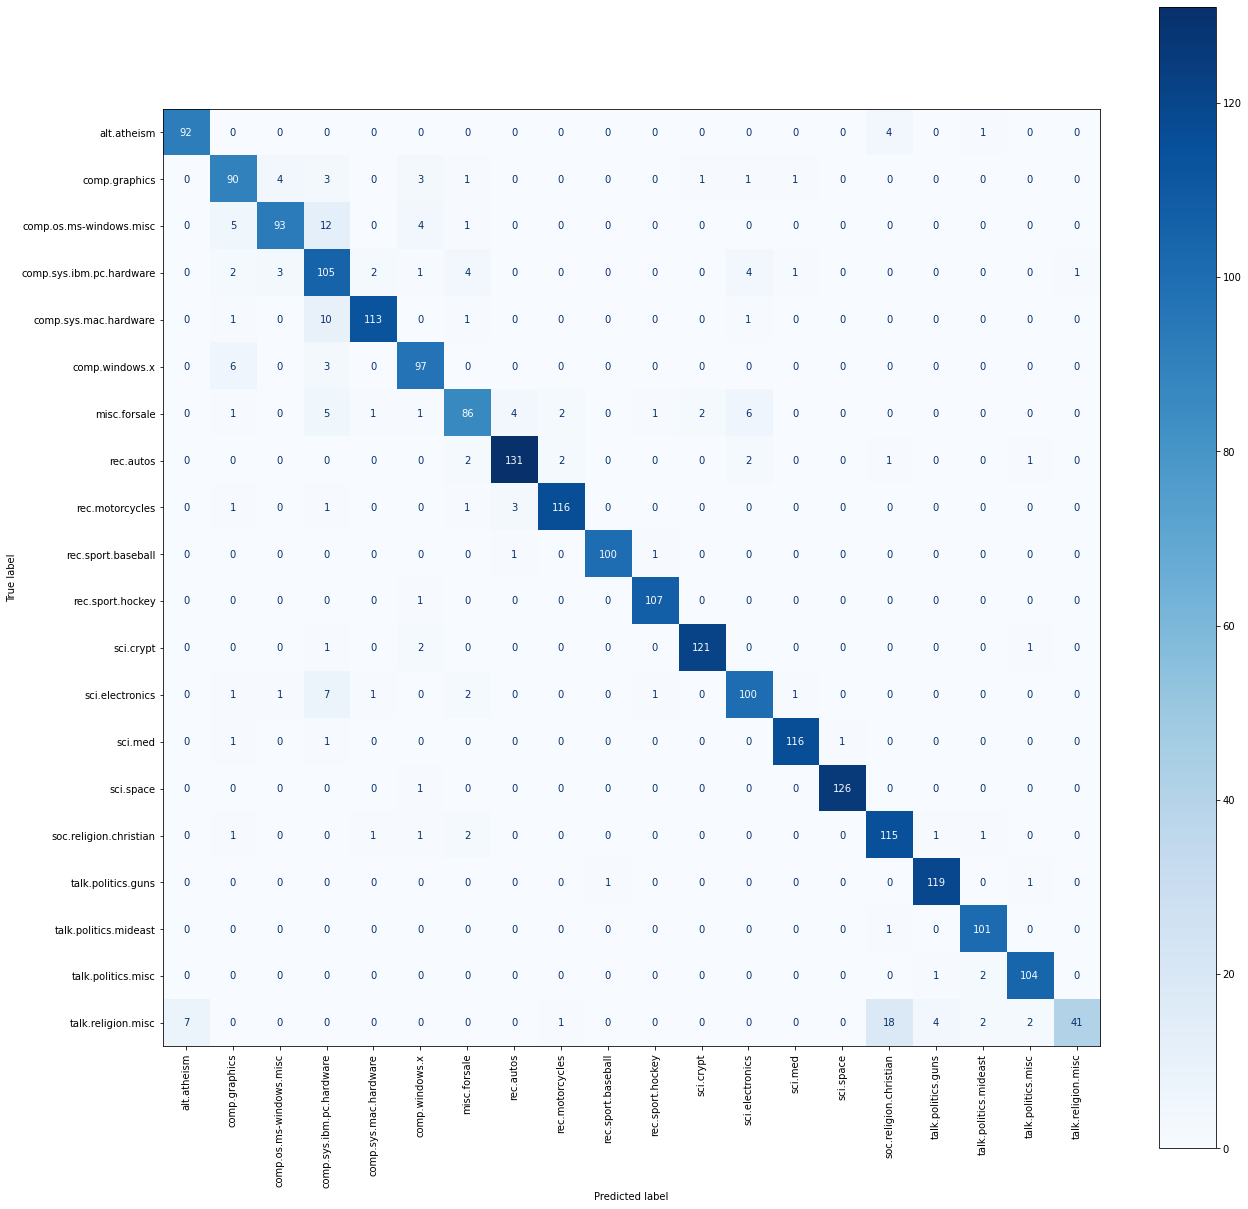

In [21]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

# Lets see if a Random Forest can do any better.

In [22]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()


# Fit our model with our training data.
rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

Model Accuracy: 0.852850
                          precision    recall  f1-score   support

             alt.atheism       0.92      0.82      0.87        97
           comp.graphics       0.69      0.84      0.76       104
 comp.os.ms-windows.misc       0.77      0.83      0.80       115
comp.sys.ibm.pc.hardware       0.74      0.68      0.71       123
   comp.sys.mac.hardware       0.85      0.79      0.82       126
          comp.windows.x       0.80      0.85      0.83       106
            misc.forsale       0.70      0.85      0.77       109
               rec.autos       0.86      0.88      0.87       139
         rec.motorcycles       0.93      0.91      0.92       122
      rec.sport.baseball       0.90      0.93      0.91       102
        rec.sport.hockey       0.94      0.94      0.94       108
               sci.crypt       0.98      0.96      0.97       125
         sci.electronics       0.82      0.74      0.78       114
                 sci.med       0.94      0.90     

In [ ]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                             display_labels=rf_model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

___
# When classifing a new piece of text.
For example, if we wanted to classify a totally new peice of text that was oustide of our training and testing data, what you must first do is feature engineer the new text the same way you did with your training text, and then transform the new text using the same vectorizer.

In [ ]:
new_text = 'I love hockey and scoring goals. The sport of hockey is fun to watch. Wayne Gretzky was the best hockey player of all time.  He scored so many goals.'

# Feature engineer the same way we did with our original data. 
new_text = text_pipeline(new_text)

# Sanity check
print(new_text)

# Turn the new_text into numbers using the vectorizer
# NOTE, must be passed in as a list.
# NOTE, use just transform here, NOT FIT. 
new_text_vectorized = vectorizer.transform([new_text])

# make a new prediction using our model and vectorized text
model.predict(new_text_vectorized)

In [ ]:
# Print the predicted probabilies for each class
pp = model.predict_proba(new_text_vectorized)
# Print probabilities for that predicition
for class_name, percentage in zip(model.classes_, pp.round(3)[0]):
    print(class_name, percentage )


# Visualizing Feature Importances with _lime_

* might have to run `pip install lime`

In [ ]:
from lime import lime_text
from sklearn.pipeline import make_pipeline



df = pd.read_csv('data/20-newsgroups.csv')

categories = ['alt.atheism', 'rec.sport.hockey']

df = df[df.topic_category.isin(categories)]

X = df['message'].values

y = df['topic_category'].values

# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



# Save text documents for later
X_train_text = X_train
X_test_texg = X_test


# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X_train)

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape, type(X))


# Initalize our random forest
rf = RandomForestClassifier(n_estimators=500)


# train our model
rf.fit(X_train, y_train)



In [ ]:
# Create a pipeline, this is new to me but super cool. 
c = make_pipeline(vectorizer, rf)


# Get a list of the class names
class_names = list(rf.classes_)


# pick a random-ish doc
idx = 99
print(X_train_text[idx])


# Get predicited probas for that doc
pp = c.predict_proba([X_train_text[idx]])


# Print probabilities for that predicition
for class_name, percentage in zip(rf.classes_, pp.round(3)[0]):
    print(class_name, percentage )


from lime.lime_text import LimeTextExplainer


# Make a new explainer 
explainer = LimeTextExplainer(class_names=class_names)


# Explain one doc
exp = explainer.explain_instance(X_train_text[idx], c.predict_proba, num_features=6)

print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([X_train_text[idx]]))
print('True class: %s' % y_train[idx])


In [ ]:
# Visualize the importances
exp.show_in_notebook(text=True)

In [ ]:
# Plot the importances
fig = exp.as_pyplot_figure()